In [53]:
!git clone https://github.com/m-xrtin/TikTok-TechJam-2025.git
%cd TikTok-TechJam-2025

Cloning into 'TikTok-TechJam-2025'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 133 (delta 60), reused 83 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 2.49 MiB | 9.79 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/TikTok-TechJam-2025/training_data/TikTok-TechJam-2025/training_data/TikTok-TechJam-2025


In [54]:
%cd training_data
!ls

/content/TikTok-TechJam-2025/training_data/TikTok-TechJam-2025/training_data/TikTok-TechJam-2025/training_data
all_data.csv  reviews_with_vader.csv


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('averaged_perceptron_tagger_eng')

nltk.download('maxent_ne_chunker_tab')

nltk.download('words')

nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
df = pd.read_csv('all_data.csv')
df.head()

,sentiment_category,gmap_id,user_name,text,spam_label,business_name,user_id,time,rating
0,negative,0x56c89428e066efd1:0xd2c5f782ad20cdd4,Ana Viaviase,Service sucks,0,Olive Garden Italian Restaurant,115565733808663898354,1.553467e+12,1.0
1,positive,0x56c66399964f479d:0xe77a3785aba22bca,Carter Finney,unknown,0,Ammo-Can Coffee Social Club,103451893753049770176,1.560923e+12,5.0
2,positive,0x5132456b105a4b49:0xd6ab175794d4c46,Jeremy Reynolds,It's a cellular store it's clean an the people...,0,Verizon,113950843636208512047,1.493661e+12,5.0
3,positive,0x56c897fe622540d5:0x26b2ca2e9bbd540c,AmitB,Excellent location. Not only close to the airp...,0,Courtyard by Marriott Anchorage Airport,unknown,1.439856e+12,-999.0
4,negative,0x56c897d37e2c91d3:0x4a6276d0fff0957f,Carissa Toner,She cancelled my appointment next week because...,0,Diamond Janitorial Services - Pre-Listing Clea...,113267373440759421440,1.616206e+12,1.0


In [57]:
print(df.shape)

(5992, 9)


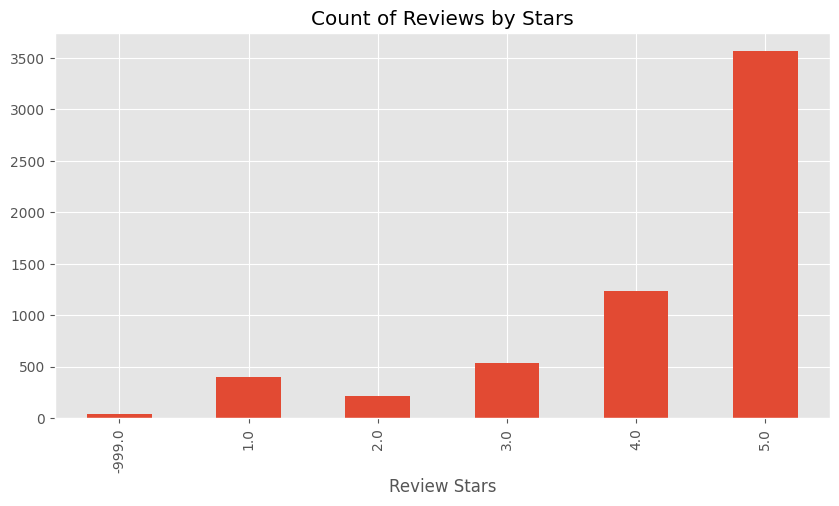

In [58]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [59]:
example = df['text'][59]
print(example)

I love this Planet Fitness and their employees are really friendly


In [60]:
tokens = nltk.word_tokenize(example)

In [61]:
tagged = nltk.pos_tag(tokens)


In [62]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  love/VBP
  this/DT
  Planet/NNP
  Fitness/NNP
  and/CC
  their/PRP$
  employees/NNS
  are/VBP
  really/RB
  friendly/JJ)


In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
df["vader_score"] = df["text"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

def vader_sentiment_label(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["vader_category"] = df["vader_score"].apply(vader_sentiment_label)
df.head()

,sentiment_category,gmap_id,user_name,text,spam_label,business_name,user_id,time,rating,vader_score,vader_category
0,negative,0x56c89428e066efd1:0xd2c5f782ad20cdd4,Ana Viaviase,Service sucks,0,Olive Garden Italian Restaurant,115565733808663898354,1.553467e+12,1.0,-0.3612,negative
1,positive,0x56c66399964f479d:0xe77a3785aba22bca,Carter Finney,unknown,0,Ammo-Can Coffee Social Club,103451893753049770176,1.560923e+12,5.0,0.0000,neutral
2,positive,0x5132456b105a4b49:0xd6ab175794d4c46,Jeremy Reynolds,It's a cellular store it's clean an the people...,0,Verizon,113950843636208512047,1.493661e+12,5.0,0.7096,positive
3,positive,0x56c897fe622540d5:0x26b2ca2e9bbd540c,AmitB,Excellent location. Not only close to the airp...,0,Courtyard by Marriott Anchorage Airport,unknown,1.439856e+12,-999.0,0.9953,positive
4,negative,0x56c897d37e2c91d3:0x4a6276d0fff0957f,Carissa Toner,She cancelled my appointment next week because...,0,Diamond Janitorial Services - Pre-Listing Clea...,113267373440759421440,1.616206e+12,1.0,-0.8934,negative


In [64]:
df.to_csv("/content/reviews_with_vader.csv", index=False)

# Download to your machine
from google.colab import files
files.download("/content/reviews_with_vader.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>